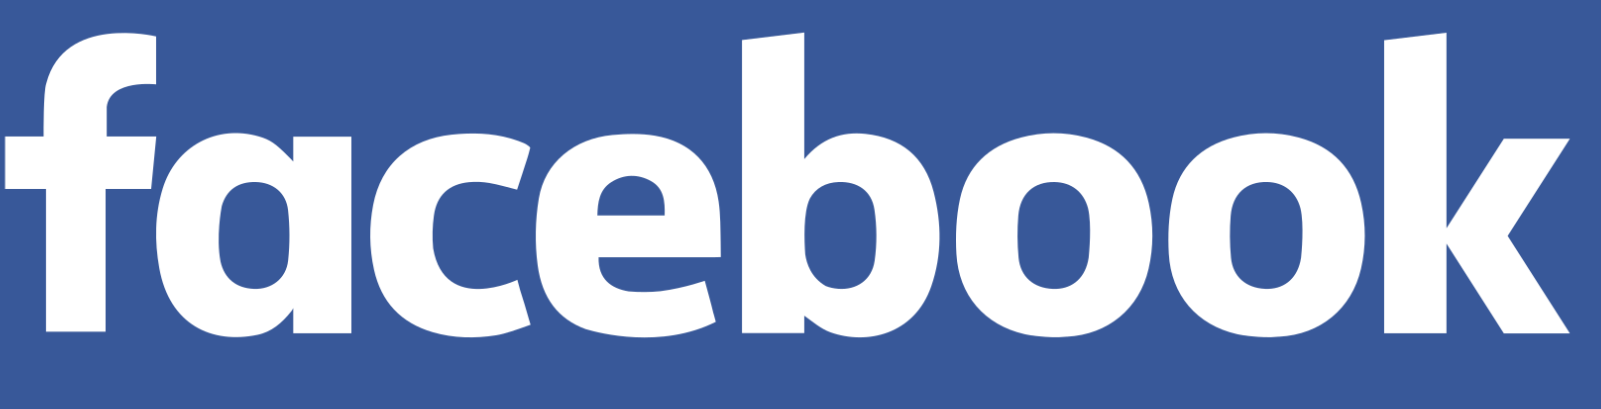

# Understanding Facebook Metrics
From our data, we'd like to gain a deeper understanding of what age groups use Facebook the most and which age groups and genders have the most activity (likes, Friends, etc.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('pseudo_facebook.csv')
df.head(5)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [6]:
df.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [8]:
df.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98826 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 98826 non-null  int64  
 1   age                    98826 non-null  int64  
 2   dob_day                98826 non-null  int64  
 3   dob_year               98826 non-null  int64  
 4   dob_month              98826 non-null  int64  
 5   gender                 98826 non-null  object 
 6   tenure                 98826 non-null  float64
 7   friend_count           98826 non-null  int64  
 8   friendships_initiated  98826 non-null  int64  
 9   likes                  98826 non-null  int64  
 10  likes_received         98826 non-null  int64  
 11  mobile_likes           98826 non-null  int64  
 12  mobile_likes_received  98826 non-null  int64  
 13  www_likes              98826 non-null  int64  
 14  www_likes_received     98826 non-null  int64  
dtypes:

In [14]:
df.describe()
df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [16]:
df.duplicated().sum()
#no duplicated vals

0

In [22]:
#Interested in different age groups at Facebook
age_grp=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
df['age_group'] = pd.cut(df['age'], bins = np.arange(10,121,10), labels = age_grp)
df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202,61-70
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,10-20
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092,10-20
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756,21-30


# Outcomes from Exploratory data analysis
1. Which age group has the most number of users
2. Which age group receives and gives the most likes on Facebook?
3. How is gender distributed on Facebook? Which gender has more activity? (friends,likes,etc.)

<AxesSubplot:title={'center':'Facebook users by age group'}, xlabel='age group'>

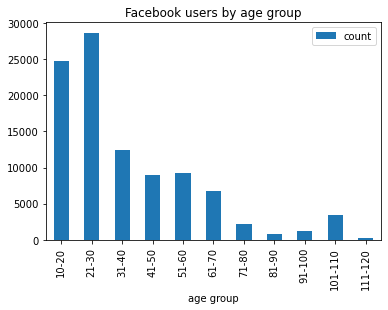

In [34]:
df2 = df['age_group'].value_counts().reset_index().rename(columns ={'age_group': 'count', 'index':'age group'})
df2.sort_values('age group', ascending=True, inplace=True)
df2.plot(kind='bar', x='age group', y='count', title = 'Facebook users by age group')

In [36]:
df2

,age group,count
1,10-20,24747
0,21-30,28634
2,31-40,12487
4,41-50,8962
3,51-60,9288
5,61-70,6830
7,71-80,2234
9,81-90,803
8,91-100,1201
6,101-110,3409


<AxesSubplot:xlabel='age'>

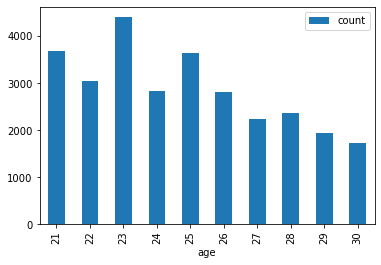

In [72]:
young = df[(df['age'] >= 21) & (df['age'] <= 30)] 
young = young['age'].value_counts().reset_index().rename(columns = {'index':'age', 'age':'count'}).sort_values('age',ascending=True)
young.plot(kind = 'bar', x = 'age')
#Most common age is 23 years old

<AxesSubplot:title={'center':'Users by gender'}>

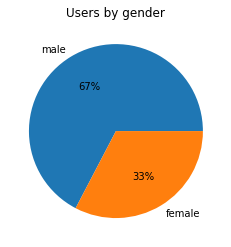

In [77]:
g23= df[df['age'] == 23].value_counts('gender')
g23.plot(kind='pie', autopct='%1.0f%%', ylabel='', title ='Users by gender' )
#Therefore, the most common individual on Facebook is a 23 year old male

[Text(0, 0, '10-20'),
 Text(1, 0, '21-30'),
 Text(2, 0, '31-40'),
 Text(3, 0, '41-50'),
 Text(4, 0, '51-60'),
 Text(5, 0, '61-70'),
 Text(6, 0, '71-80'),
 Text(7, 0, '81-90'),
 Text(8, 0, '91-100'),
 Text(9, 0, '101-110'),
 Text(10, 0, '111-120')]

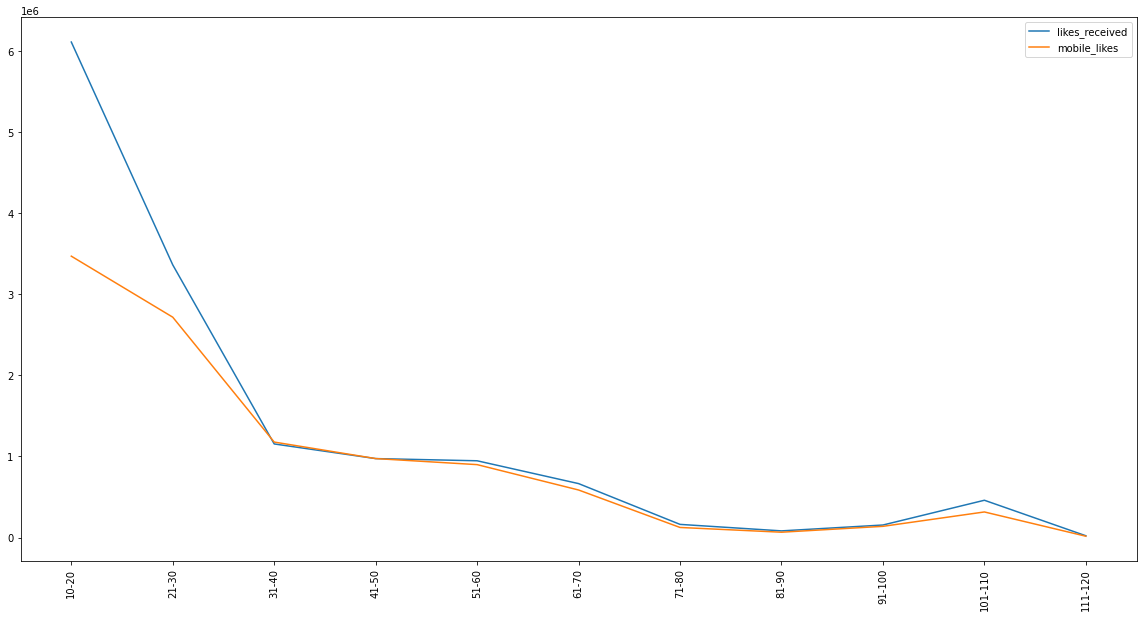

In [150]:
#I'm interested in what age group posts the most and receive the most likes. 
likereceive = df[['likes_received','age_group', 'mobile_likes' ]].groupby('age_group').sum().reset_index()
ax = likereceive[['likes_received','mobile_likes']].plot(xticks=likereceive.index, figsize = (20,10))
ax.set_xticklabels(likereceive['age_group'], rotation=90)

#Drastic reduction in likes received from 10-20 to 31-40.

<AxesSubplot:xlabel='gender'>

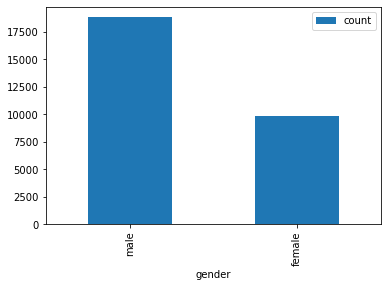

In [174]:
younggender=df['gender'][[(df['age_group'] == '10-20')] and (df['age_group'] =='21-30')].value_counts().reset_index().rename(columns={'index':'gender', 'gender':'count'})
younggender.plot(kind ='bar', x ='gender')
#Most young Facebook users are male

<AxesSubplot:xlabel='age_group'>

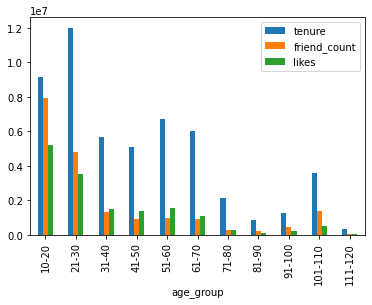

In [183]:
new =df[['age_group', 'gender', 'tenure','friend_count','likes']].groupby('age_group').sum().reset_index()
new.plot(kind='bar', x ='age_group')
#As expected, the 10-20 and 21-30 age group spend more time on Facebook and as a result of that they have a greater friend count and more likes/activity.